In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import mstats
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv")
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


Did people become happier from 2012 to 2014? Compute results for each country in the sample.
Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

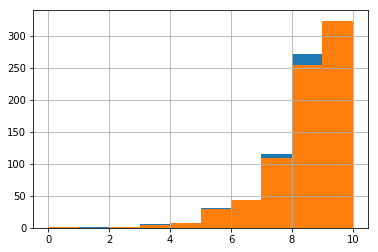

In [3]:
country = df.groupby("cntry")
year = country.get_group("CH").groupby("year")
year["happy"].hist()
plt.show()

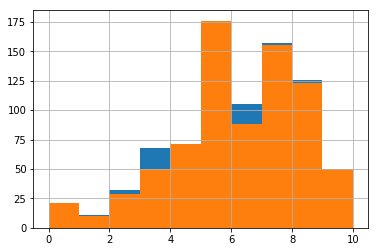

In [4]:
year["ppltrst"].hist()
plt.show()

In [5]:
ch_2012 = year.get_group(6)
ch_2014 = year.get_group(7)
print("2012 happy mean:", np.mean(ch_2012["happy"]))
print("2014 happy mean:", np.mean(ch_2014["happy"]))
stats.kruskal(list(ch_2012.dropna()["happy"]), list(ch_2014.dropna()["happy"]))

2012 happy mean: 8.088311688311688
2014 happy mean: 8.116429495472186


KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)

These groups are not statstically different

In [6]:
print("2012 trust mean:", np.mean(ch_2012["ppltrst"]))
print("2014 trust mean:", np.mean(ch_2014["ppltrst"]))
stats.kruskal(list(ch_2012.dropna()["ppltrst"]), list(ch_2014.dropna()["ppltrst"]))

2012 trust mean: 5.677878395860285
2014 trust mean: 5.751617076326003


KruskalResult(statistic=0.3211329972268854, pvalue=0.5709275494134165)

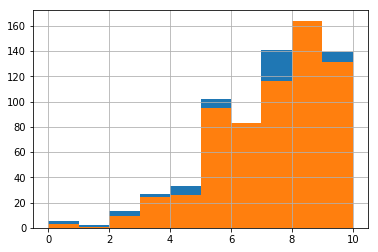

In [7]:
country = df.groupby("cntry")
year = country.get_group("CZ").groupby("year")
year["happy"].hist()
plt.show()

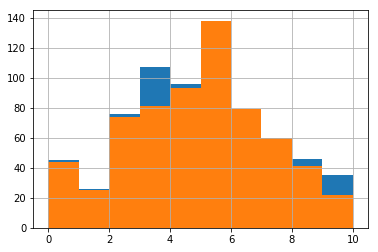

In [8]:
year["ppltrst"].hist()
plt.show()

In [9]:
cz_2012 = year.get_group(6)
cz_2014 = year.get_group(7)
print("2012 happy mean:", np.mean(cz_2012["happy"]))
print("2014 happy mean:", np.mean(cz_2014["happy"]))
stats.kruskal(list(cz_2012.dropna()["happy"]), list(cz_2014.dropna()["happy"]))

2012 happy mean: 6.7708978328173375
2014 happy mean: 6.914110429447852


KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)

In [10]:
print("2012 trust mean:", np.mean(cz_2012["ppltrst"]))
print("2014 trust mean:", np.mean(cz_2014["ppltrst"]))
stats.kruskal(list(cz_2012.dropna()["ppltrst"]), list(cz_2014.dropna()["ppltrst"]))

2012 trust mean: 4.362519201228879
2014 trust mean: 4.424657534246576


KruskalResult(statistic=3.397334444818437e-05, pvalue=0.9953494239190417)

Who reported watching more TV in 2012, men or women?

In [11]:
gender = df.groupby("gndr")
male = gender.get_group(1.0).groupby("year").get_group(6.0)
female = gender.get_group(2.0).groupby("year").get_group(6.0)
print("Male average tv watched in 2012:", male["tvtot"].mean())
print("Female average tv watched in 2012:", female["tvtot"].mean())

Male average tv watched in 2012: 3.901906090190609
Female average tv watched in 2012: 3.944392523364486


Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

In [14]:
partner = df.groupby("partner")
y = partner.get_group(1.0)
n = partner.get_group(2.0)
print("People with partners that believe people were fair mean:", y["pplfair"].mean())
print("People without partners that believe people were fair mean:", n["pplfair"].mean())

People with partners that believe people were fair mean: 6.063890473474045
People without partners that believe people were fair mean: 5.911280487804878


Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

In [17]:
df.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [18]:
ch = country.get_group("CH")
cz = country.get_group("CZ")
de = country.get_group("DE")
print("Switzerland's average:", ch["sclmeet"].mean())
print("Czech Republic's average:", cz["sclmeet"].mean())
print("Germany's average:", de["sclmeet"].mean())

Switzerland's average: 5.120622568093385
Czech Republic's average: 4.5473282442748095
Germany's average: 4.714285714285714


Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [19]:
print("Switzerland's average:", ch["sclact"].mean())
print("Czech Republic's average:", cz["sclact"].mean())
print("Germany's average:", de["sclact"].mean())

Switzerland's average: 2.7432874918140144
Czech Republic's average: 2.6584234930448223
Germany's average: 2.7857142857142856
